In [ ]:
# SARIMAX
# http://nbviewer.jupyter.org/gist/ChadFulton/5127108f4c7025ed2648

Text(0.5,1,'Net Bookings')

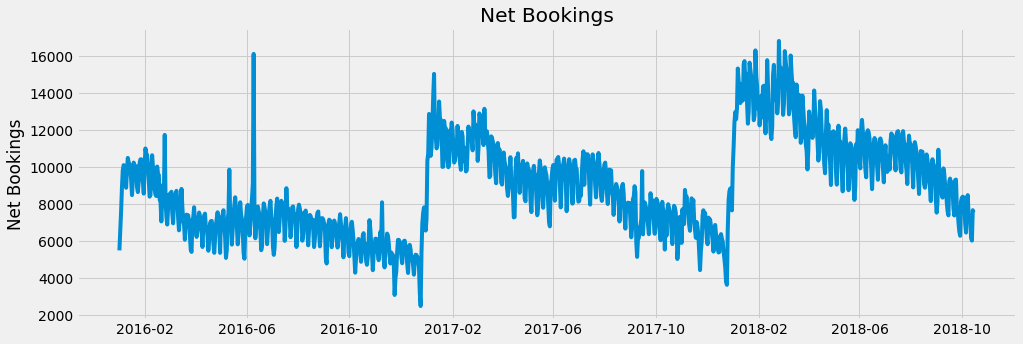

In [6]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'AMR') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.index = pd.to_datetime(df.date)

cols = ["nb"]
y = df[cols]
y.head()

plt.figure(figsize=(15,5))
plt.plot(df.index,df['nb'])
plt.ylabel('Net Bookings')
plt.title('Net Bookings')

In [7]:
y.head()

,nb
date,
2016-01-01,5500
2016-01-02,6513
2016-01-03,7602
2016-01-04,8871
2016-01-05,9828


In [21]:
# Fit the model
mod = sm.tsa.SARIMAX(y, trend='c', order=(2,3,(1,0,1,1)))
results = mod.fit()
print (res.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                     nb   No. Observations:                 1019
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -8428.165
Date:                Sun, 11 Nov 2018   AIC                          16864.330
Time:                        18:20:52   BIC                          16884.033
Sample:                    01-01-2016   HQIC                         16871.812
                         - 10-15-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1435      4.569      0.031      0.975      -8.811       9.098
ar.L1          0.5821      0.035     16.864      0.000       0.514       0.650
ma.L1         -0.8577      0.025    -34.716      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


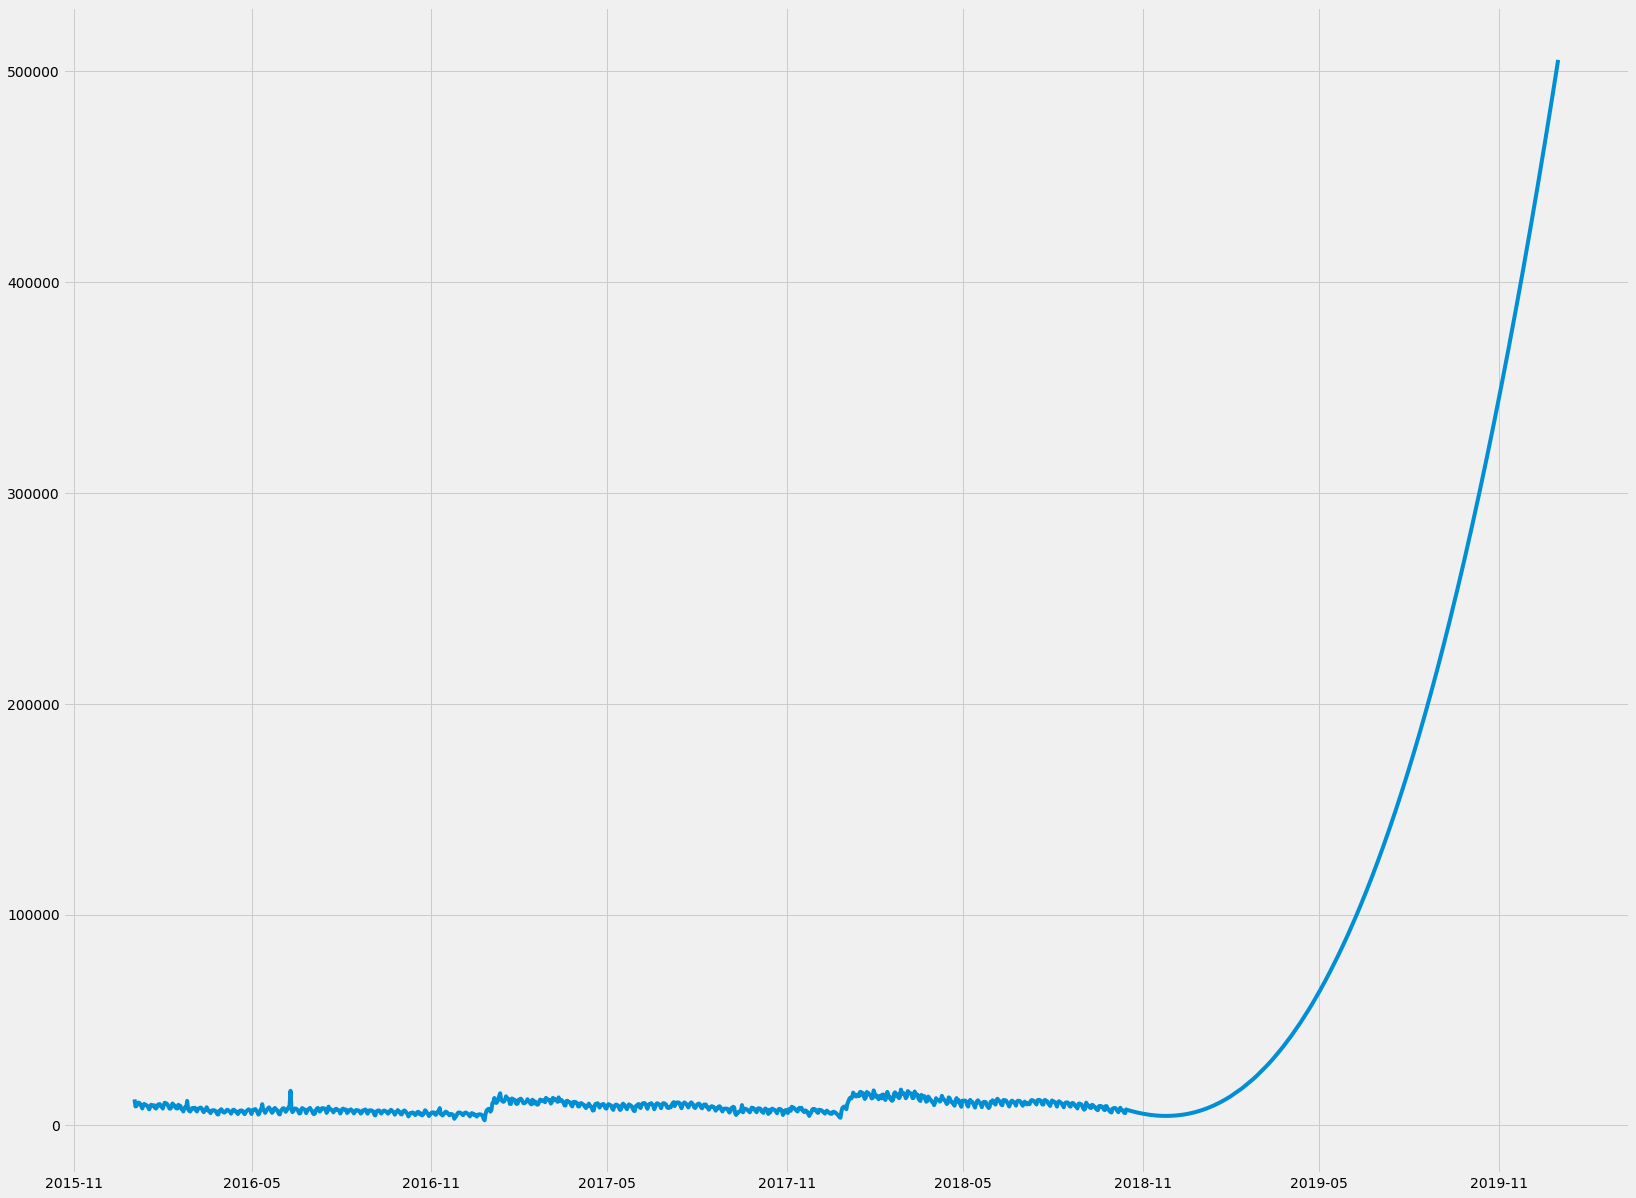

In [22]:
pred_fcst = results.predict(start=1, end=1461, dynamic=False)
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(pred_fcst)

In [24]:
# Dataset
#data = pd.read_stata('air2.dta')
#data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
y['lnnb'] = np.log(y['nb'])

# Fit the model
mod = sm.tsa.SARIMAX(y['lnnb'], order=(1,1,1), seasonal_order=(0,1,1,12))
results = mod.fit()
print (results.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               lnnb   No. Observations:                 1019
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 742.925
Date:                            Sun, 11 Nov 2018   AIC                          -1477.851
Time:                                    18:29:21   BIC                          -1458.196
Sample:                                01-01-2016   HQIC                         -1470.383
                                     - 10-15-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6278      0.037     17.120      0.000       0.556       0.700
ma.L1         -0.8797      0.025   

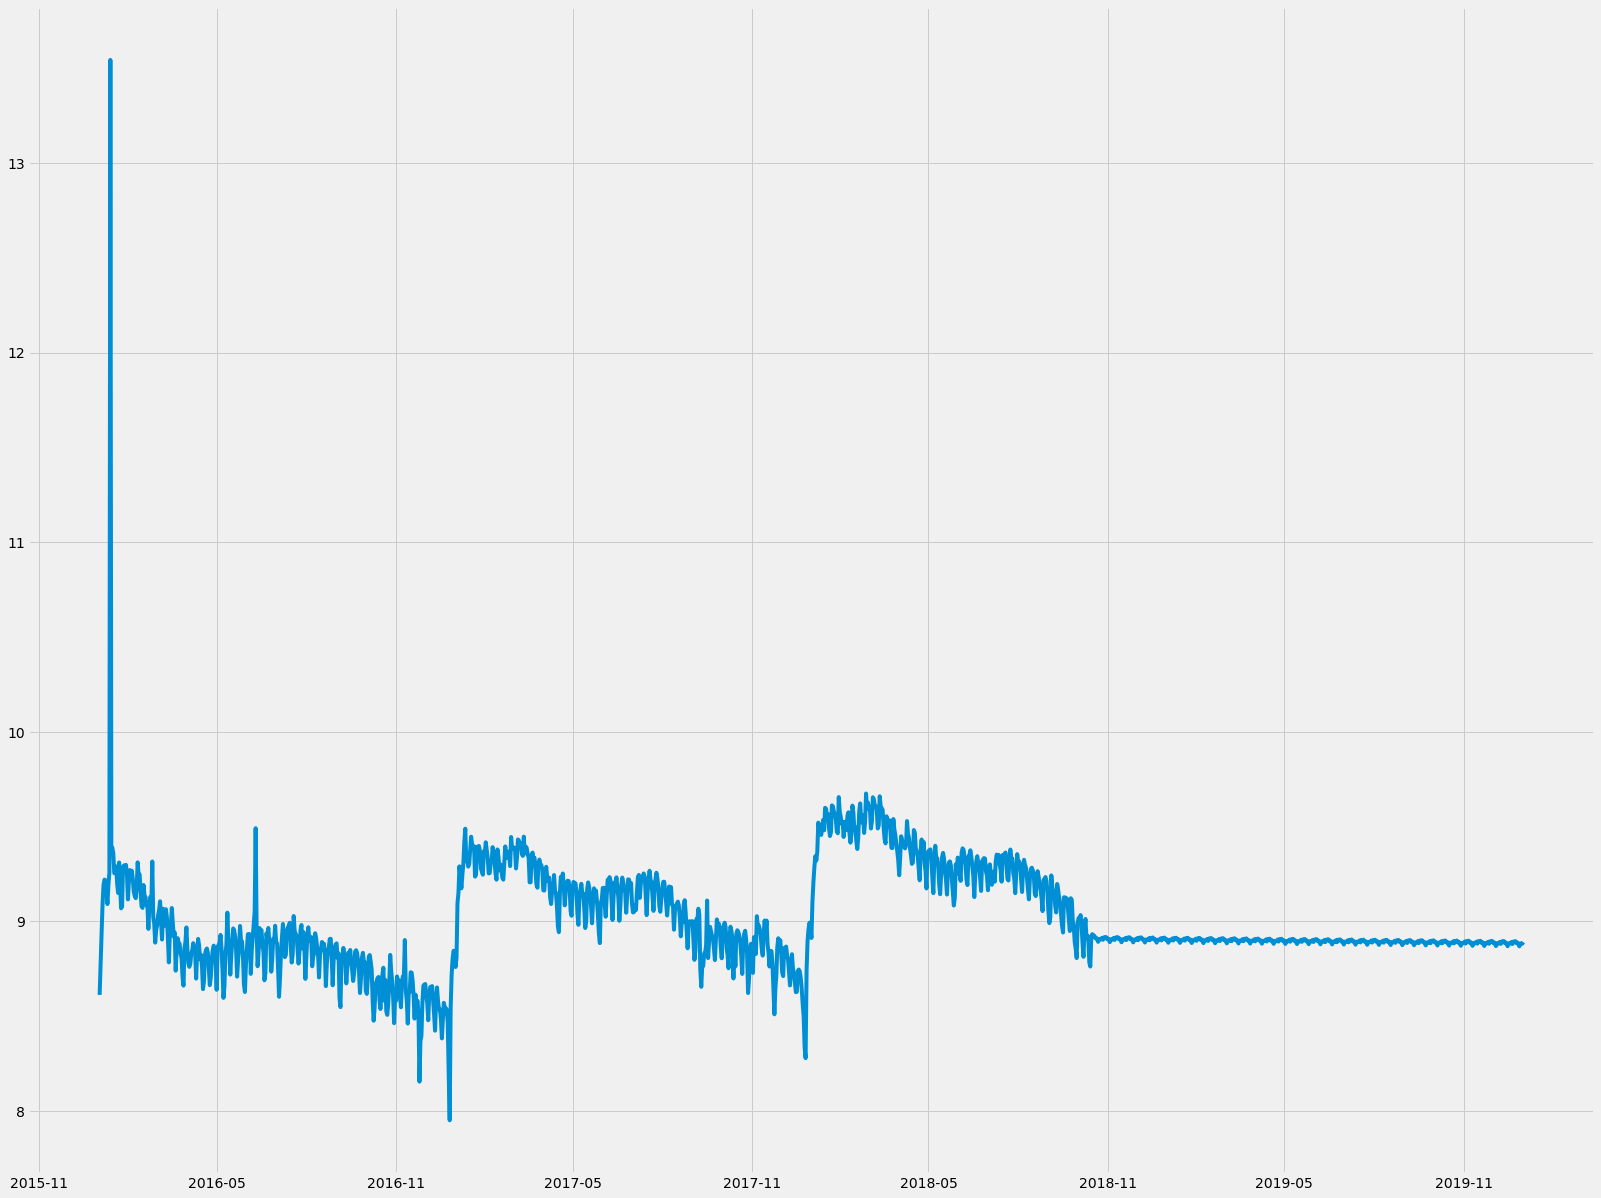

In [25]:
pred_fcst = results.predict(start=1, end=1461, dynamic=False)
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(pred_fcst)

In [27]:
# Dataset
data = pd.read_stata('friedman2.dta')
data.index = data.time

# Variables
endog = data.ix['1959':'1981', 'consump']
exog = sm.add_constant(data.ix['1959':'1981', 'm2'])

# Fit the model
mod = sm.tsa.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit()
print (res.summary())

                           Statespace Model Results                           
Dep. Variable:                consump   No. Observations:                   92
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -340.508
Date:                Sun, 11 Nov 2018   AIC                            691.015
Time:                        18:33:13   BIC                            703.624
Sample:                    01-01-1959   HQIC                           696.105
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0608     56.645     -0.637      0.524    -147.084      74.962
m2             1.1220      0.036     30.824      0.000       1.051       1.193
ar.L1          0.9348      0.041     22.717      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


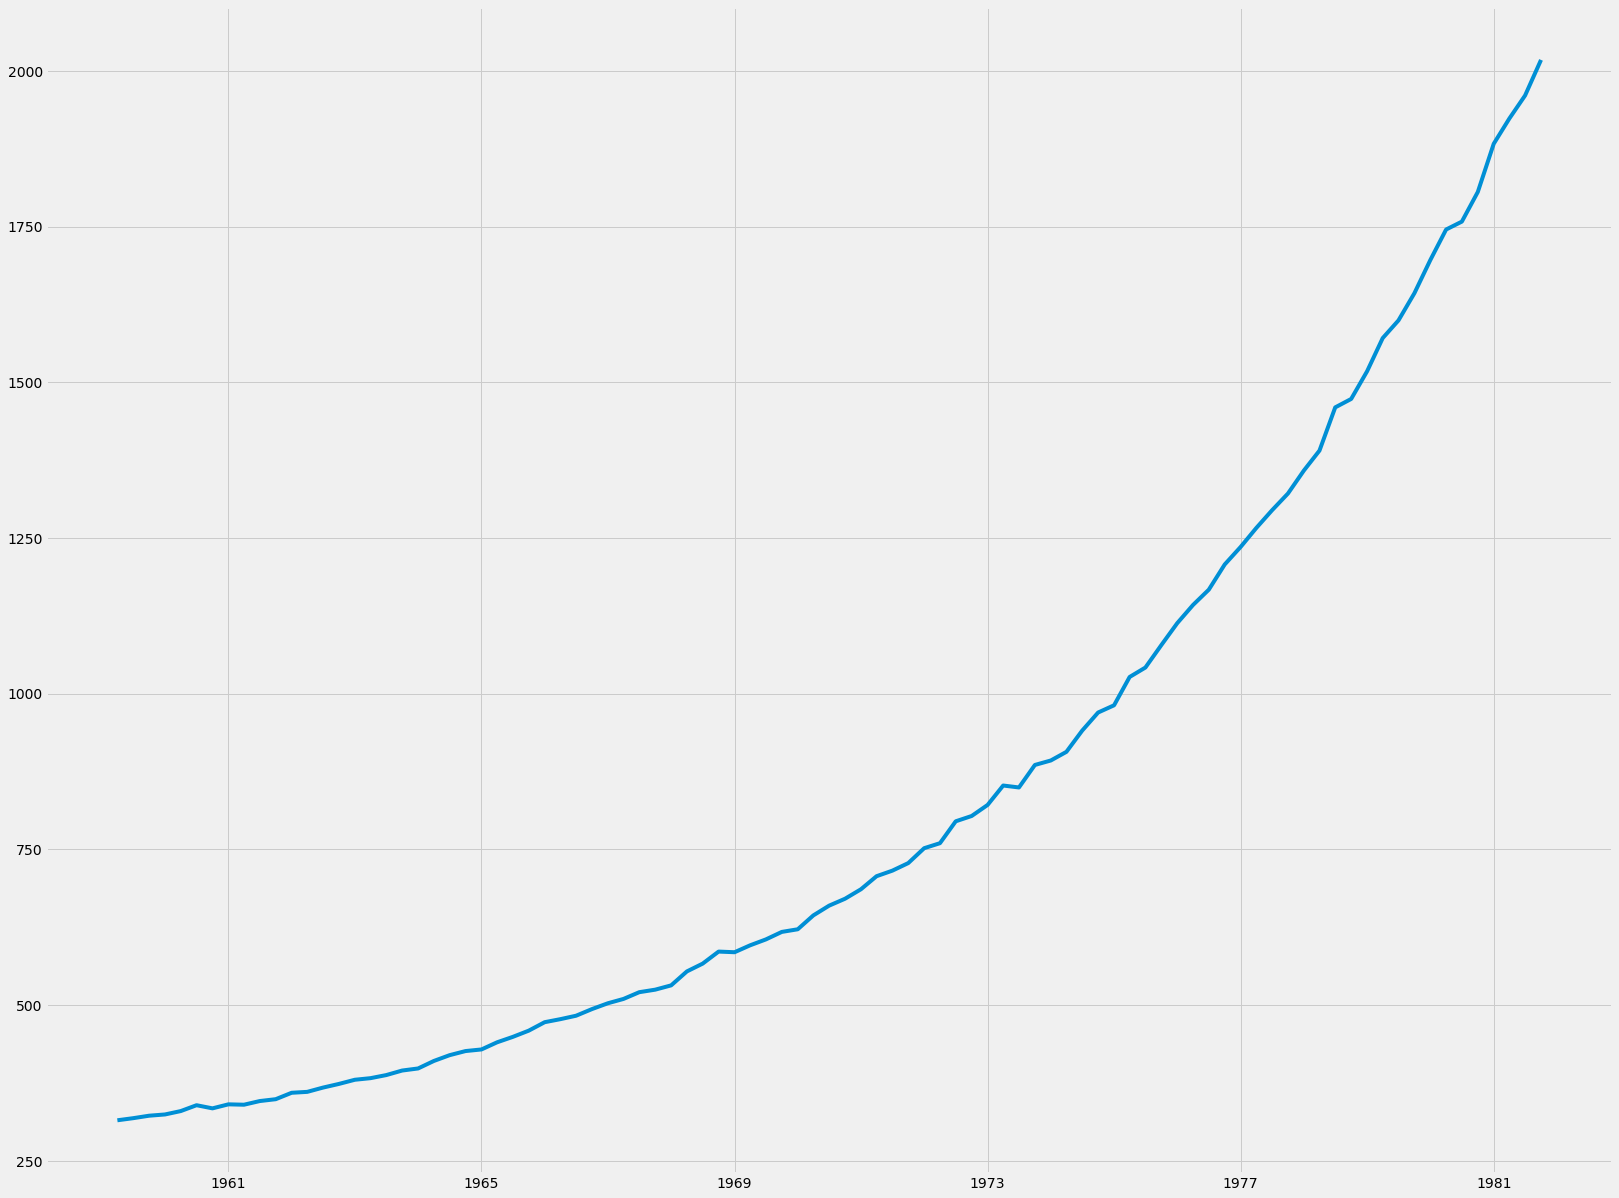

In [29]:
pred_fcst = res.predict(start=1, dynamic=False)
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(pred_fcst)

In [30]:
data.head(3)

,m2,time,m1,consump,pc92
time,,,,,
1946-01-01,NaN,1946-01-01,NaN,134.899994,NaN
1946-04-01,NaN,1946-04-01,NaN,140.100006,NaN
1946-07-01,NaN,1946-07-01,NaN,148.899994,NaN


In [31]:
endog.head(3)

time
1959-01-01    310.399994
1959-04-01    316.399994
1959-07-01    321.700012
Name: consump, dtype: float32

In [32]:
exog.head(3)

,const,m2
time,,
1959-01-01,1.0,289.149994
1959-04-01,1.0,294.049988
1959-07-01,1.0,296.730011


In [33]:
exog.describe()

,const,m2
count,92.0,92.000000
mean,1.0,770.418030
std,0.0,423.846649
min,1.0,289.149994
25%,1.0,422.774994
50%,1.0,603.179993
75%,1.0,1056.950012
max,1.0,1756.189941


In [35]:
# Dataset
raw = pd.read_stata('friedman2.dta')
raw.index = raw.time
data = raw.ix[:'1981']

# Variables
endog = data.ix['1959':, 'consump']
exog = sm.add_constant(data.ix['1959':, 'm2'])
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.SARIMAX(endog.ix[:'1978-01-01'], exog=exog.ix[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit()
print (fit_res.summary())

                           Statespace Model Results                           
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Sun, 11 Nov 2018   AIC                            496.633
Time:                        18:42:29   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
                         - 01-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6760     18.490      0.037      0.971     -35.563      36.915
m2             1.0379      0.021     50.333      0.000       0.997       1.078
ar.L1          0.8775      0.059     14.859      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ValueError: too many values to unpack (expected 4)

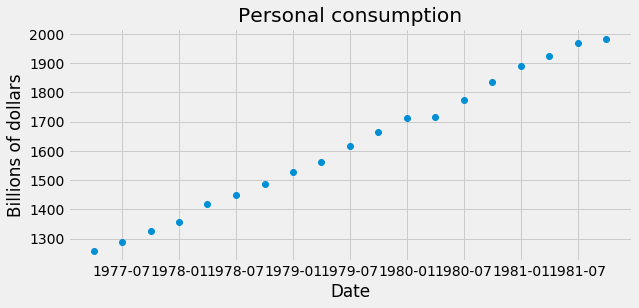

In [43]:
# Prediction
npredict = data.ix['1978-01-01':].shape[0]
mod = sm.tsa.SARIMAX(endog, exog=exog, order=(1,0,1))
mod.update(fit_res.params)
#res = mod.filter()
res = mod.fit()

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')
ax.plot(data.index[-npredict-npre+1:], data.ix[-npredict-npre+1:, 'consump'], 'o', label='Observed')

# In-sample one-step-ahead predictions and 95% confidence intervals (forecast without data)
predict, cov, ci, idx = res.predict(alpha=0.05)
#predict, cov, ci, idx = mod.predict(alpha=0.05)
ax.plot(idx[-npredict-npre:], predict[0, -npredict-npre:], 'r--', label='One-step-ahead forecast');
ax.plot(idx[-npredict-npre:], ci[0, -npredict-npre:], 'r--', alpha=0.3)

# Dynamic predictions and 95% confidence intervals
predict_dy, cov_dy, ci_dy, idx_dy = res.predict(dynamic=nobs-npredict-1, alpha=0.01)
ax.plot(idx_dy[-npredict-npre:], predict_dy[0, -npredict-npre:], 'g', label='Dynamic forecast (1978)');
ax.plot(idx_dy[-npredict-npre:], ci_dy[0, -npredict-npre:], 'g:', alpha=0.3);

legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')

In [38]:
# Prediction
npredict = data.ix['1978-01-01':].shape[0]
mod = sm.tsa.SARIMAX(endog, exog=exog, order=(1,0,1))
mod.update(fit_res.params)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


array([ 0.67597326,  1.03788107,  0.87753932,  0.27707949, 31.69808776])

In [46]:
# Dataset
#data = pd.read_stata('wpi1.dta')
#data.index = data.t
#data['ln_wpi'] = np.log(data['wpi'])
#data['D.ln_wpi'] = data['ln_wpi'].diff()

y['lnnb'] = np.log(y['nb'])
y['D.lnnb'] = y['lnnb'].diff()
y.head(3)

,nb,lnnb,D.lnnb
date,,,
2016-01-01,5500,8.612503,NaN
2016-01-02,6513,8.781555,0.169052
2016-01-03,7602,8.936167,0.154611


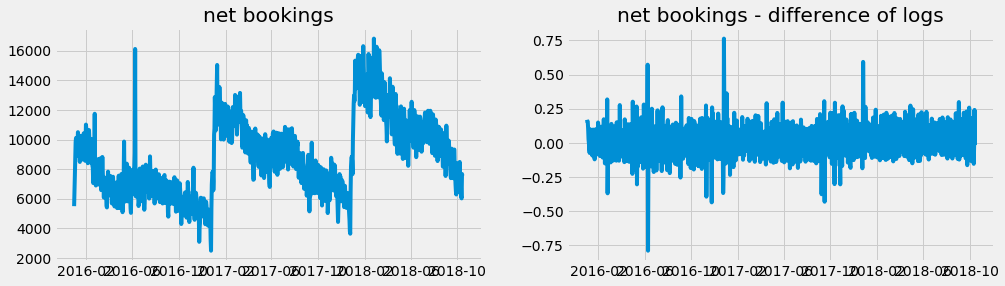

In [48]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(y.index, y['nb'])
axes[0].set(title='net bookings')

# Log difference
axes[1].plot(y.index, y['D.lnnb'])
axes[1].hlines(0, y.index[0], y.index[-1], 'r')
axes[1].set(title='net bookings - difference of logs');

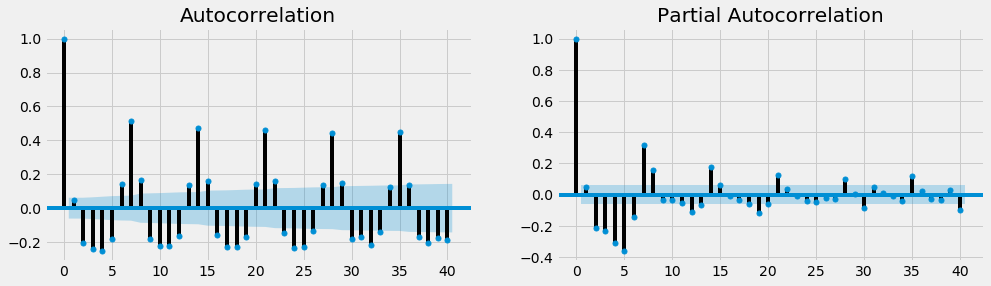

In [49]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(y.ix[1:, 'D.lnnb'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(y.ix[1:, 'D.lnnb'], lags=40, ax=axes[1])

In [50]:
#
decomposition = seasonal_decompose(y.nb, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

NameError: name 'seasonal_decompose' is not defined

In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

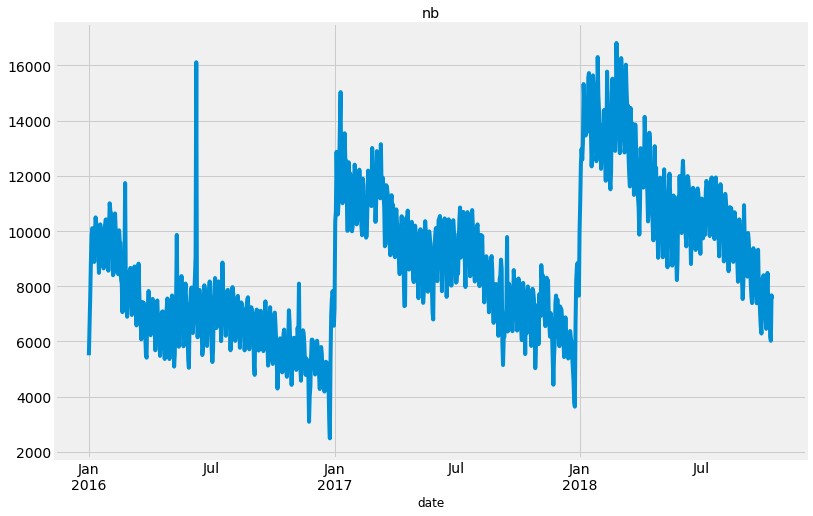

In [53]:
y.nb.plot(figsize=(12,8), title= 'nb', fontsize=14)
plt.savefig('nb.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

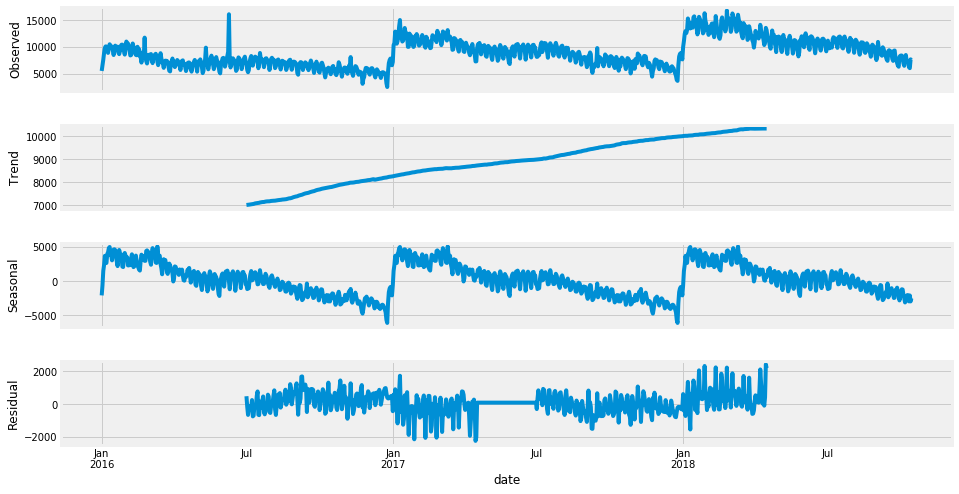

In [59]:
decomposition = seasonal_decompose(y.nb, freq=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

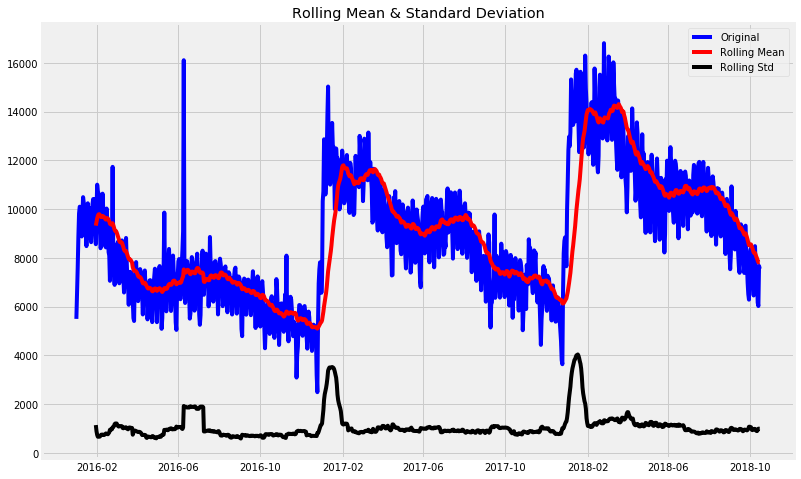

Results of Dickey-Fuller Test:
Test Statistic                  -2.574367
p-value                          0.098412
#Lags Used                      22.000000
Number of Observations Used    996.000000
Critical Value (1%)             -3.436933
Critical Value (5%)             -2.864446
Critical Value (10%)            -2.568317
dtype: float64


In [75]:
test_stationarity(y.nb)

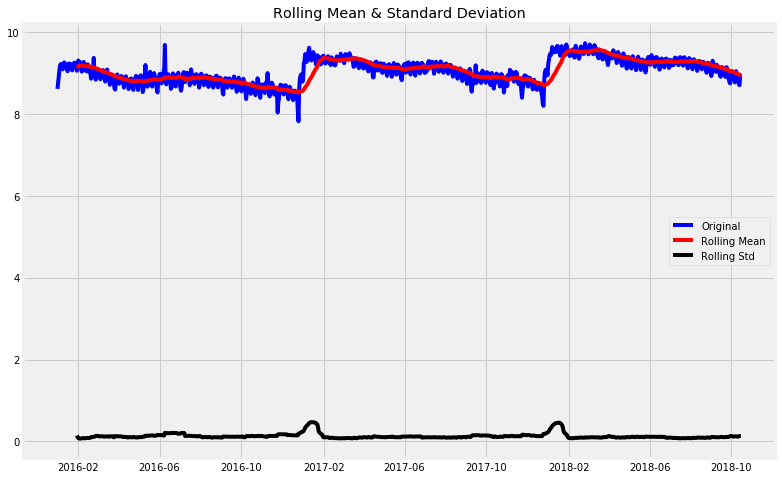

Results of Dickey-Fuller Test:
Test Statistic                  -2.478749
p-value                          0.120731
#Lags Used                      21.000000
Number of Observations Used    997.000000
Critical Value (1%)             -3.436926
Critical Value (5%)             -2.864443
Critical Value (10%)            -2.568316
dtype: float64


In [76]:
y.nb_log= y.nb.apply(lambda x: np.log(x))  
test_stationarity(y.nb_log)

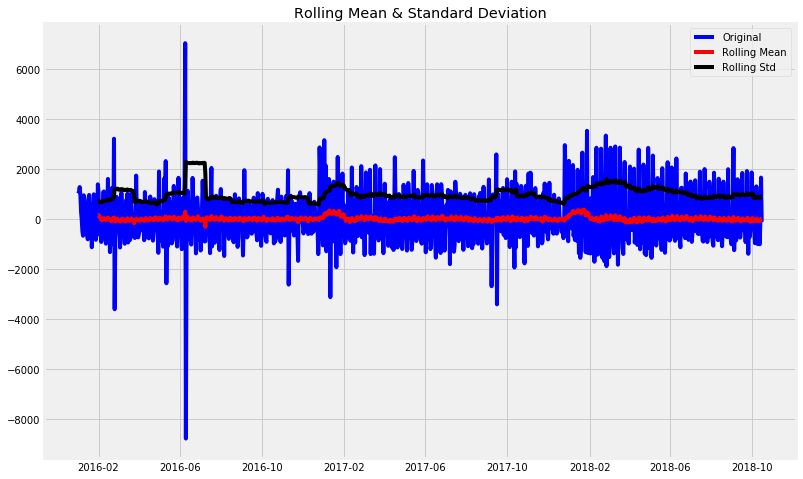

Results of Dickey-Fuller Test:
Test Statistic                -6.902087e+00
p-value                        1.274390e-09
#Lags Used                     2.100000e+01
Number of Observations Used    9.960000e+02
Critical Value (1%)           -3.436933e+00
Critical Value (5%)           -2.864446e+00
Critical Value (10%)          -2.568317e+00
dtype: float64


In [77]:
y['first_difference'] = y.nb - y.nb.shift(1)  
test_stationarity(y.first_difference.dropna(inplace=False))

In [78]:
y.head()

,nb,lnnb,D.lnnb,first_difference,log_first_difference
date,,,,,
2016-01-01,5500,8.612503,NaN,NaN,NaN
2016-01-02,6513,8.781555,0.169052,1013.0,0.169052
2016-01-03,7602,8.936167,0.154611,1089.0,0.154611
2016-01-04,8871,9.090543,0.154376,1269.0,0.154376
2016-01-05,9828,9.192991,0.102448,957.0,0.102448


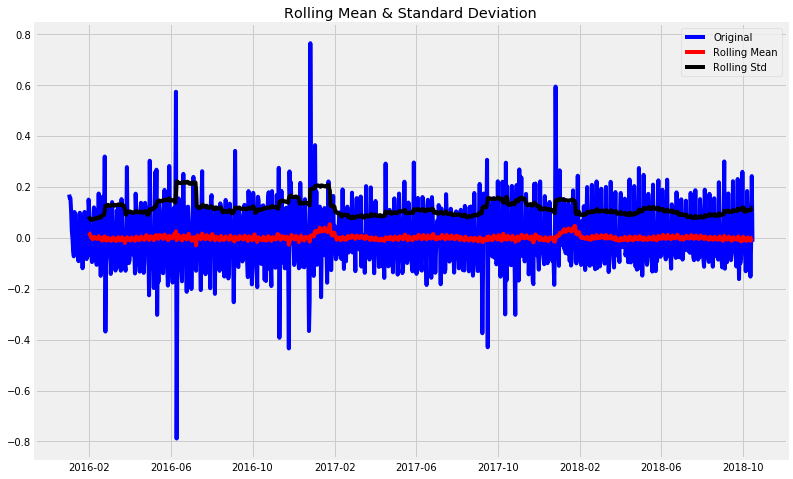

Results of Dickey-Fuller Test:
Test Statistic                -7.729953e+00
p-value                        1.132350e-11
#Lags Used                     2.000000e+01
Number of Observations Used    9.970000e+02
Critical Value (1%)           -3.436926e+00
Critical Value (5%)           -2.864443e+00
Critical Value (10%)          -2.568316e+00
dtype: float64


In [79]:
y['log_first_difference'] = y.nb_log - y.nb_log.shift(1)  
test_stationarity(y.log_first_difference.dropna(inplace=False))

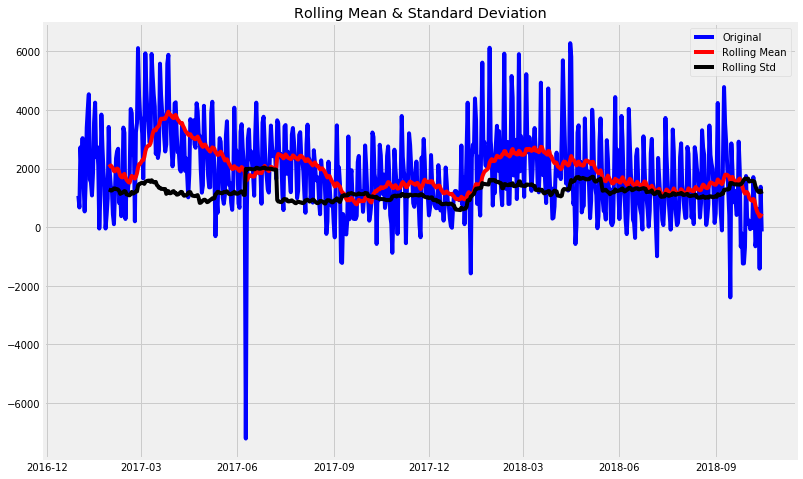

Results of Dickey-Fuller Test:
Test Statistic                  -1.722948
p-value                          0.419329
#Lags Used                      20.000000
Number of Observations Used    633.000000
Critical Value (1%)             -3.440723
Critical Value (5%)             -2.866117
Critical Value (10%)            -2.569207
dtype: float64


In [80]:
y['seasonal_difference'] = y.nb - y.nb.shift(365)
test_stationarity(y.seasonal_difference.dropna(inplace=False))

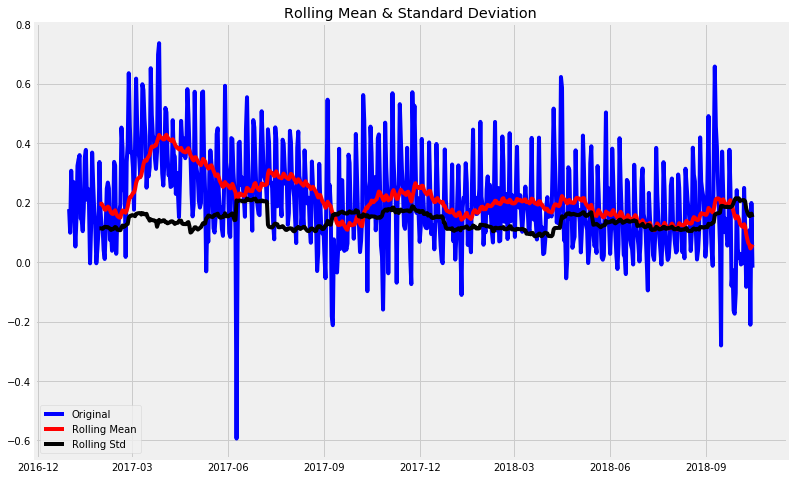

Results of Dickey-Fuller Test:
Test Statistic                  -1.567587
p-value                          0.499852
#Lags Used                      20.000000
Number of Observations Used    633.000000
Critical Value (1%)             -3.440723
Critical Value (5%)             -2.866117
Critical Value (10%)            -2.569207
dtype: float64


In [81]:
y['log_seasonal_difference'] = y.nb_log - y.nb_log.shift(365)  
test_stationarity(y.log_seasonal_difference.dropna(inplace=False))

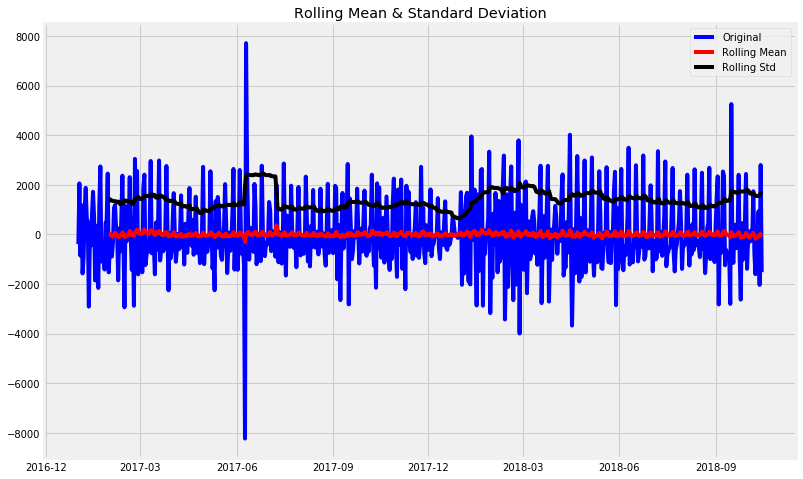

Results of Dickey-Fuller Test:
Test Statistic                -8.483026e+00
p-value                        1.376739e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.330000e+02
Critical Value (1%)           -3.440723e+00
Critical Value (5%)           -2.866117e+00
Critical Value (10%)          -2.569207e+00
dtype: float64


In [82]:
y['seasonal_first_difference'] = y.first_difference - y.first_difference.shift(365)  
test_stationarity(y.seasonal_first_difference.dropna(inplace=False))

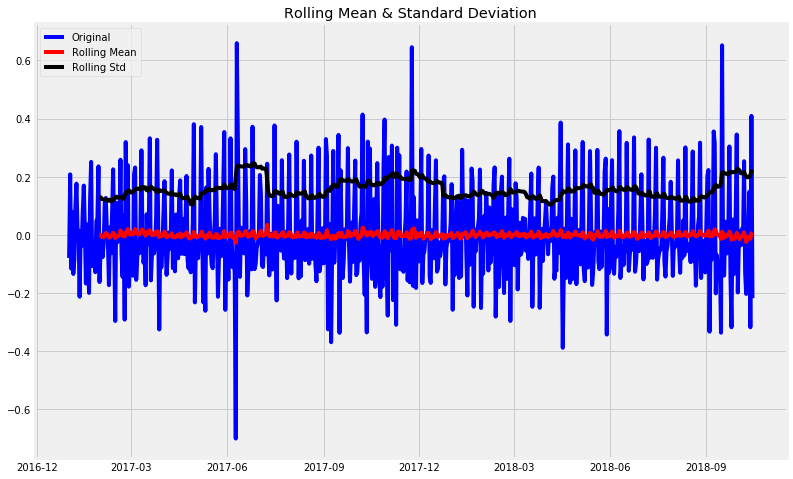

Results of Dickey-Fuller Test:
Test Statistic                -7.720692e+00
p-value                        1.194865e-11
#Lags Used                     2.000000e+01
Number of Observations Used    6.320000e+02
Critical Value (1%)           -3.440739e+00
Critical Value (5%)           -2.866124e+00
Critical Value (10%)          -2.569211e+00
dtype: float64


In [83]:
y['log_seasonal_first_difference'] = y.log_first_difference - y.log_first_difference.shift(365)  
test_stationarity(y.log_seasonal_first_difference.dropna(inplace=False))